<a href="https://colab.research.google.com/github/AbhaijeetSingh11/Machine-Learning-for-Kyphosis-Disease-Classification/blob/main/Machine_Learning_for_Kyphosis_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning for Kyphosis Disease Classification:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

###Importing data from csv file:

In [4]:
#provide path to csv to access data
data = pd.read_csv("/content/drive/MyDrive/Machine learning/kyphosis.csv")

In [76]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB



###Encoding Kyphosis column into binary 0 or 1

In [10]:
#converting Kyphosis column values to 0 (absent) or 1 (present)
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
data['Kyphosis'] = Le.fit_transform(data['Kyphosis'])
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [13]:
data.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


(array([64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

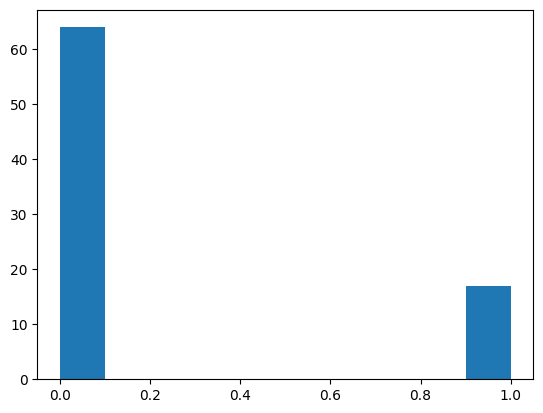

In [19]:
plt.hist(data['Kyphosis'])

###Analysing correlation between features through correlation matrix

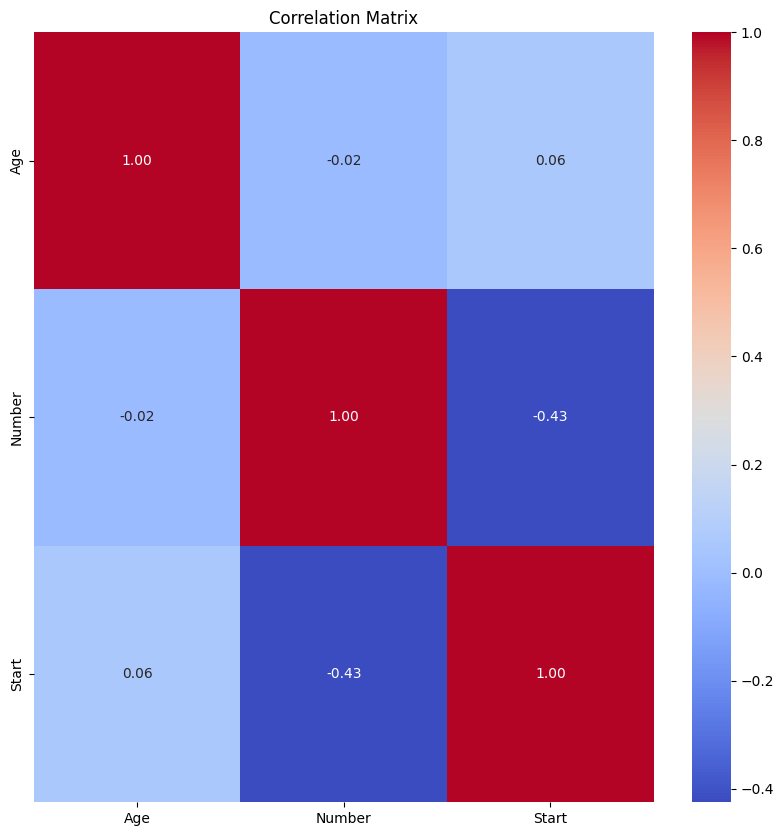

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('Kyphosis',axis=1).corr(),annot = True,cmap = 'coolwarm',fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

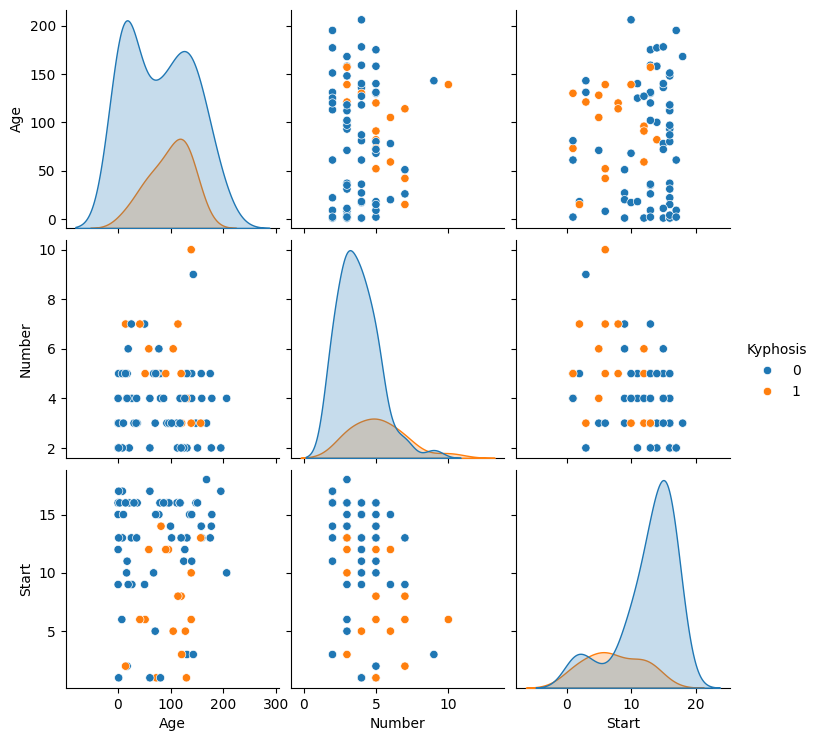

In [30]:
sns.pairplot(data,hue = 'Kyphosis')

###Preparing data for training

In [41]:
X = data.drop('Kyphosis',axis = 1)
Y = data['Kyphosis']

In [42]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [43]:
Y

,Kyphosis
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

###Using LogisticRegression model for training and testing data

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [60]:
ypred = model.predict(x_test)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0])

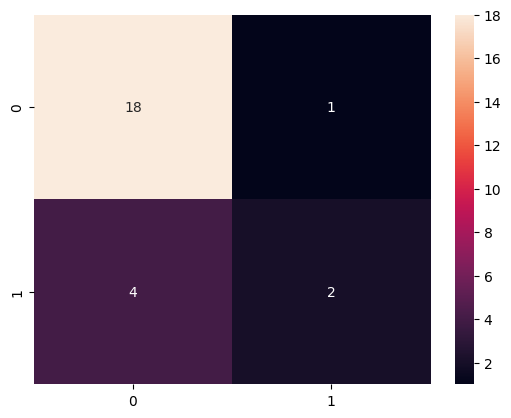

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [52]:
print("accuracy of model :",accuracy_score(y_test,ypred))

accuracy of model : 0.8235294117647058


In [64]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25



Using DecisionTreeClassifier model for training and testing data

In [65]:
#improving model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
ypred2 = model2.predict(x_test)
ypred2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

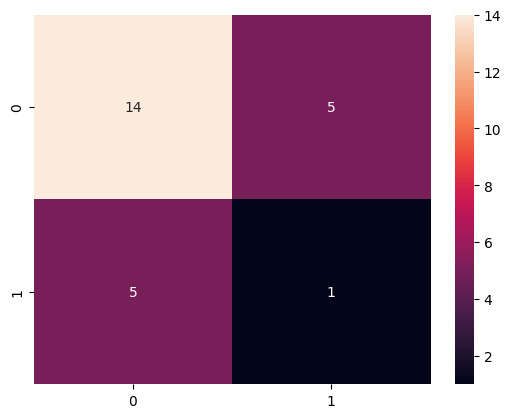

In [67]:
cm = confusion_matrix(y_test,ypred2)
sns.heatmap(cm,annot=True)
plt.show()

In [70]:
print("accuracy of model :",accuracy_score(y_test,ypred2))

accuracy of model : 0.6


In [68]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.17      0.17      0.17         6

    accuracy                           0.60        25
   macro avg       0.45      0.45      0.45        25
weighted avg       0.60      0.60      0.60        25



Using RandomForestClassifier model for training and testing data

In [71]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
ypred3 = model3.predict(x_test)
ypred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [73]:
print(accuracy_score(y_test,ypred3))

0.8


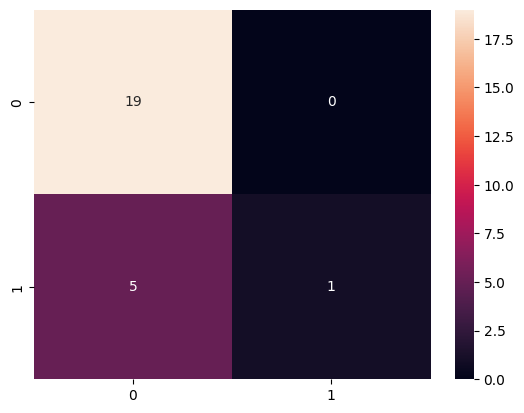

In [78]:
cm = confusion_matrix(y_test,ypred3)
sns.heatmap(cm,annot=True)
plt.show()

In [75]:
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

